Erfan Mirzaei : 810199289

In [ ]:
import numpy as np
import os, sys 
import random 
import matplotlib.pyplot as plt
import copy
from torchvision.transforms import ToTensor
import torch 
from torch import linalg as LA
from torch import Tensor
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import random_split
import torchvision.datasets as datasets
from tqdm.notebook import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Network

In [ ]:
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        # defining fully connected layers
        self.fc1 = nn.Linear(784, 200)
        self.fc2 = nn.Linear(200, 200)
        self.fc3 = nn.Linear(200,10)

    def forward(self, x):
        # flatten the input to (batch_size, 28 *28)
        x = x.view(x.size(0), -1)       
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        output = self.fc3(x)
        return output    

## Load Data

In [ ]:
batch_size = 32
torch.manual_seed(2045)
trainset, valset = random_split(mnist_trainset, (50000 ,10000))

train_loader = torch.utils.data.DataLoader(
                 dataset=trainset,
                 batch_size=batch_size,
                 shuffle=True
                 )

val_loader = torch.utils.data.DataLoader(
                 dataset= valset,
                 batch_size=1,
                 shuffle=True
                 )

test_loader = torch.utils.data.DataLoader(
                dataset=mnist_testset,
                batch_size=batch_size,
                shuffle= True
                )

In [ ]:
mnist_trainset = datasets.MNIST(root='/content/drive/My Drive', train=True, download=True, transform=ToTensor())
mnist_testset = datasets.MNIST(root='/content/drive/My Drive', train=False, download=True, transform=ToTensor())

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


## Training 

In [ ]:
# Model 
Net = DNN()
Net.to(device)

# Define Loss function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(Net.parameters(), lr = 0.001, weight_decay = 0.001)
# scheduler = StepLR(optimizer, step_size=1, gamma=0.99) 

train_losses = []
validation_losses = []

train_accs = []
val_accs = []

max_epochs = 10

# Loop over epochs
for epoch in tqdm(range(max_epochs)):
    
    running_trainloss, running_valloss, running_loss, train_acc = 0.0, 0.0, 0.0, 0.0
    train_cnt, val_cnt = 0, 0

    # Training
    for train_data, train_labels in tqdm(train_loader):
        # Transfer to GPU
        train_data, train_labels = train_data.to(device), train_labels.to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # Model computations
        # forward + backward + optimize
        batch_train_outputs = Net(train_data)
        # print(batch_train_outputs.shape, train_labels.shape)
        # break
        loss = criterion(batch_train_outputs, train_labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_trainloss += loss.item()
        running_loss += loss.item()

        train_acc += torch.sum(torch.argmax(batch_train_outputs, dim =1) ==  train_labels.long()) / torch.numel(train_labels)

        if train_cnt % 100 == 99:    # print every 10 mini-batches
            print("Cost of Train data after %i iterations in epoch %i : %f" %(train_cnt + 1,epoch + 1, running_loss / 100))
            running_loss = 0.0

        train_cnt += 1
    
    # # Validation
    # running_loss, val_acc = 0.0, 0.0

    # with torch.set_grad_enabled(False):
    #     for val_data, val_labels in tqdm(val_loader):
    #         # Transfer to GPU
    #         val_data, val_labels = val_data.to(device), val_labels.to(device)
            
    #         # Model computations
    #         # forward + backward + optimize
    #         batch_outputs = Net(val_data)
            
    #         val_loss = criterion(batch_outputs, val_labels.long())

    #         running_valloss += val_loss.item()
    #         running_loss += val_loss.item()

    #         val_acc += torch.sum(torch.argmax(batch_outputs, dim =1) ==  val_labels.long()) / torch.numel(val_labels)

    #         if val_cnt % 100 == 99:    # print every 10 mini-batches
    #             print("Cost of Validation data after %i iterations in epoch %i : %f" %(val_cnt + 1,epoch + 1, running_loss / 100))
    #             running_loss = 0.0

    #         val_cnt += 1
    
    # scheduler.step()      
    train_losses.append(running_trainloss / train_cnt)
    train_accs.append(train_acc / train_cnt * 100)
    # validation_losses.append(running_valloss / val_cnt)
    # val_accs.append(val_acc / val_cnt * 100)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:00<?, ?it/s]

Cost of Train data after 100 iterations in epoch 1 : 2.002693
Cost of Train data after 200 iterations in epoch 1 : 1.079911
Cost of Train data after 300 iterations in epoch 1 : 0.692971
Cost of Train data after 400 iterations in epoch 1 : 0.549411
Cost of Train data after 500 iterations in epoch 1 : 0.489853
Cost of Train data after 600 iterations in epoch 1 : 0.447480
Cost of Train data after 700 iterations in epoch 1 : 0.391269
Cost of Train data after 800 iterations in epoch 1 : 0.399943
Cost of Train data after 900 iterations in epoch 1 : 0.396360
Cost of Train data after 1000 iterations in epoch 1 : 0.372069
Cost of Train data after 1100 iterations in epoch 1 : 0.374623
Cost of Train data after 1200 iterations in epoch 1 : 0.348657
Cost of Train data after 1300 iterations in epoch 1 : 0.342664
Cost of Train data after 1400 iterations in epoch 1 : 0.382563
Cost of Train data after 1500 iterations in epoch 1 : 0.346167


  0%|          | 0/1563 [00:00<?, ?it/s]

Cost of Train data after 100 iterations in epoch 2 : 0.347106
Cost of Train data after 200 iterations in epoch 2 : 0.329397
Cost of Train data after 300 iterations in epoch 2 : 0.322549
Cost of Train data after 400 iterations in epoch 2 : 0.328455
Cost of Train data after 500 iterations in epoch 2 : 0.326894
Cost of Train data after 600 iterations in epoch 2 : 0.302314
Cost of Train data after 700 iterations in epoch 2 : 0.315726
Cost of Train data after 800 iterations in epoch 2 : 0.303351
Cost of Train data after 900 iterations in epoch 2 : 0.285322
Cost of Train data after 1000 iterations in epoch 2 : 0.297190
Cost of Train data after 1100 iterations in epoch 2 : 0.299799
Cost of Train data after 1200 iterations in epoch 2 : 0.305595
Cost of Train data after 1300 iterations in epoch 2 : 0.308846
Cost of Train data after 1400 iterations in epoch 2 : 0.320705
Cost of Train data after 1500 iterations in epoch 2 : 0.308553


  0%|          | 0/1563 [00:00<?, ?it/s]

Cost of Train data after 100 iterations in epoch 3 : 0.293723
Cost of Train data after 200 iterations in epoch 3 : 0.283826
Cost of Train data after 300 iterations in epoch 3 : 0.299042
Cost of Train data after 400 iterations in epoch 3 : 0.282739
Cost of Train data after 500 iterations in epoch 3 : 0.268606
Cost of Train data after 600 iterations in epoch 3 : 0.287196
Cost of Train data after 700 iterations in epoch 3 : 0.275929
Cost of Train data after 800 iterations in epoch 3 : 0.287415
Cost of Train data after 900 iterations in epoch 3 : 0.261464
Cost of Train data after 1000 iterations in epoch 3 : 0.266320
Cost of Train data after 1100 iterations in epoch 3 : 0.262718
Cost of Train data after 1200 iterations in epoch 3 : 0.295844
Cost of Train data after 1300 iterations in epoch 3 : 0.270505
Cost of Train data after 1400 iterations in epoch 3 : 0.268848
Cost of Train data after 1500 iterations in epoch 3 : 0.273441


  0%|          | 0/1563 [00:00<?, ?it/s]

Cost of Train data after 100 iterations in epoch 4 : 0.261583
Cost of Train data after 200 iterations in epoch 4 : 0.268680
Cost of Train data after 300 iterations in epoch 4 : 0.261174
Cost of Train data after 400 iterations in epoch 4 : 0.249702
Cost of Train data after 500 iterations in epoch 4 : 0.257351
Cost of Train data after 600 iterations in epoch 4 : 0.269186
Cost of Train data after 700 iterations in epoch 4 : 0.254828
Cost of Train data after 800 iterations in epoch 4 : 0.246305
Cost of Train data after 900 iterations in epoch 4 : 0.250450
Cost of Train data after 1000 iterations in epoch 4 : 0.252328
Cost of Train data after 1100 iterations in epoch 4 : 0.255765
Cost of Train data after 1200 iterations in epoch 4 : 0.266233
Cost of Train data after 1300 iterations in epoch 4 : 0.255599
Cost of Train data after 1400 iterations in epoch 4 : 0.243529
Cost of Train data after 1500 iterations in epoch 4 : 0.242408


  0%|          | 0/1563 [00:00<?, ?it/s]

Cost of Train data after 100 iterations in epoch 5 : 0.228308
Cost of Train data after 200 iterations in epoch 5 : 0.258323
Cost of Train data after 300 iterations in epoch 5 : 0.234886
Cost of Train data after 400 iterations in epoch 5 : 0.230017
Cost of Train data after 500 iterations in epoch 5 : 0.265355
Cost of Train data after 600 iterations in epoch 5 : 0.254101
Cost of Train data after 700 iterations in epoch 5 : 0.248264
Cost of Train data after 800 iterations in epoch 5 : 0.224702
Cost of Train data after 900 iterations in epoch 5 : 0.252198
Cost of Train data after 1000 iterations in epoch 5 : 0.268978
Cost of Train data after 1100 iterations in epoch 5 : 0.218941
Cost of Train data after 1200 iterations in epoch 5 : 0.233901
Cost of Train data after 1300 iterations in epoch 5 : 0.228370
Cost of Train data after 1400 iterations in epoch 5 : 0.243101
Cost of Train data after 1500 iterations in epoch 5 : 0.253960


  0%|          | 0/1563 [00:00<?, ?it/s]

Cost of Train data after 100 iterations in epoch 6 : 0.250569
Cost of Train data after 200 iterations in epoch 6 : 0.235641
Cost of Train data after 300 iterations in epoch 6 : 0.246400
Cost of Train data after 400 iterations in epoch 6 : 0.223714
Cost of Train data after 500 iterations in epoch 6 : 0.250145
Cost of Train data after 600 iterations in epoch 6 : 0.215817
Cost of Train data after 700 iterations in epoch 6 : 0.215296
Cost of Train data after 800 iterations in epoch 6 : 0.247684
Cost of Train data after 900 iterations in epoch 6 : 0.233392
Cost of Train data after 1000 iterations in epoch 6 : 0.220571
Cost of Train data after 1100 iterations in epoch 6 : 0.206051
Cost of Train data after 1200 iterations in epoch 6 : 0.245954
Cost of Train data after 1300 iterations in epoch 6 : 0.244360
Cost of Train data after 1400 iterations in epoch 6 : 0.223141
Cost of Train data after 1500 iterations in epoch 6 : 0.233083


  0%|          | 0/1563 [00:00<?, ?it/s]

Cost of Train data after 100 iterations in epoch 7 : 0.238256
Cost of Train data after 200 iterations in epoch 7 : 0.210082
Cost of Train data after 300 iterations in epoch 7 : 0.215153
Cost of Train data after 400 iterations in epoch 7 : 0.211723
Cost of Train data after 500 iterations in epoch 7 : 0.219485
Cost of Train data after 600 iterations in epoch 7 : 0.229542
Cost of Train data after 700 iterations in epoch 7 : 0.249375
Cost of Train data after 800 iterations in epoch 7 : 0.231938
Cost of Train data after 900 iterations in epoch 7 : 0.234389
Cost of Train data after 1000 iterations in epoch 7 : 0.216021
Cost of Train data after 1100 iterations in epoch 7 : 0.222264
Cost of Train data after 1200 iterations in epoch 7 : 0.220398
Cost of Train data after 1300 iterations in epoch 7 : 0.229437
Cost of Train data after 1400 iterations in epoch 7 : 0.233950
Cost of Train data after 1500 iterations in epoch 7 : 0.243353


  0%|          | 0/1563 [00:00<?, ?it/s]

Cost of Train data after 100 iterations in epoch 8 : 0.219005
Cost of Train data after 200 iterations in epoch 8 : 0.218433
Cost of Train data after 300 iterations in epoch 8 : 0.211525
Cost of Train data after 400 iterations in epoch 8 : 0.242329
Cost of Train data after 500 iterations in epoch 8 : 0.223429
Cost of Train data after 600 iterations in epoch 8 : 0.216276
Cost of Train data after 700 iterations in epoch 8 : 0.208095
Cost of Train data after 800 iterations in epoch 8 : 0.252036
Cost of Train data after 900 iterations in epoch 8 : 0.222801
Cost of Train data after 1000 iterations in epoch 8 : 0.222555
Cost of Train data after 1100 iterations in epoch 8 : 0.223815
Cost of Train data after 1200 iterations in epoch 8 : 0.220192
Cost of Train data after 1300 iterations in epoch 8 : 0.241508
Cost of Train data after 1400 iterations in epoch 8 : 0.196304
Cost of Train data after 1500 iterations in epoch 8 : 0.205730


  0%|          | 0/1563 [00:00<?, ?it/s]

Cost of Train data after 100 iterations in epoch 9 : 0.199367
Cost of Train data after 200 iterations in epoch 9 : 0.222097
Cost of Train data after 300 iterations in epoch 9 : 0.204592
Cost of Train data after 400 iterations in epoch 9 : 0.221136
Cost of Train data after 500 iterations in epoch 9 : 0.218474
Cost of Train data after 600 iterations in epoch 9 : 0.226954
Cost of Train data after 700 iterations in epoch 9 : 0.215897
Cost of Train data after 800 iterations in epoch 9 : 0.215041
Cost of Train data after 900 iterations in epoch 9 : 0.205458
Cost of Train data after 1000 iterations in epoch 9 : 0.244706
Cost of Train data after 1100 iterations in epoch 9 : 0.209886
Cost of Train data after 1200 iterations in epoch 9 : 0.227823
Cost of Train data after 1300 iterations in epoch 9 : 0.209750
Cost of Train data after 1400 iterations in epoch 9 : 0.235349
Cost of Train data after 1500 iterations in epoch 9 : 0.216838


  0%|          | 0/1563 [00:00<?, ?it/s]

Cost of Train data after 100 iterations in epoch 10 : 0.241612
Cost of Train data after 200 iterations in epoch 10 : 0.198160
Cost of Train data after 300 iterations in epoch 10 : 0.211797
Cost of Train data after 400 iterations in epoch 10 : 0.204702
Cost of Train data after 500 iterations in epoch 10 : 0.200103
Cost of Train data after 600 iterations in epoch 10 : 0.220818
Cost of Train data after 700 iterations in epoch 10 : 0.219167
Cost of Train data after 800 iterations in epoch 10 : 0.211106
Cost of Train data after 900 iterations in epoch 10 : 0.207849
Cost of Train data after 1000 iterations in epoch 10 : 0.206159
Cost of Train data after 1100 iterations in epoch 10 : 0.211241
Cost of Train data after 1200 iterations in epoch 10 : 0.214575
Cost of Train data after 1300 iterations in epoch 10 : 0.221188
Cost of Train data after 1400 iterations in epoch 10 : 0.208957
Cost of Train data after 1500 iterations in epoch 10 : 0.228768


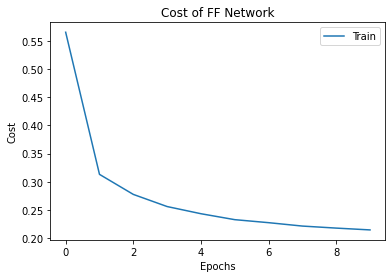

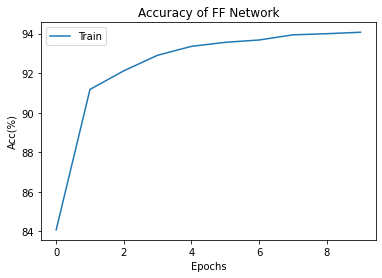

In [ ]:
plot_cost, plot_acc = 1, 1
# plot the cost
if plot_cost:
    plt.plot(train_losses)
    # plt.plot(validation_losses)
    plt.title("Cost of FF Network")
    plt.ylabel('Cost')
    plt.xlabel('Epochs')
    plt.legend(labels = ["Train"])
    plt.show()

if plot_acc:
    plt.plot(train_accs)
    # plt.plot(val_accs)
    plt.title("Accuracy of FF Network")
    plt.ylabel('Acc(%)')
    plt.xlabel('Epochs')
    plt.legend(labels = ["Train"])
    plt.show()

## Test 

In [ ]:
# test
running_testloss, test_acc = 0.0, 0.0
test_cnt = 0

with torch.set_grad_enabled(False):
    for test_data, test_labels in tqdm(test_loader):
        # Transfer to GPU
        test_data, test_labels = test_data.to(device), test_labels.to(device)
        
        # Model computations
        # forward + backward + optimize
        batch_outputs = Net(test_data)
        
        test_loss = criterion(batch_outputs, test_labels.long())

        running_testloss += test_loss.item()

        test_acc += torch.sum(torch.argmax(batch_outputs, dim =1) ==  test_labels.long()) / torch.numel(test_labels)

        # if test_cnt % 100 == 99:    # print every 10 mini-batches
        #     print("Cost of testidation data after %i iterations in epoch %i : %f" %(test_cnt + 1,epoch + 1, running_loss / 100))
        #     running_loss = 0.0

        test_cnt += 1

print((100 * test_acc / test_cnt).item() )

  0%|          | 0/313 [00:00<?, ?it/s]

94.66853332519531


Let’s quickly save our trained model:

In [ ]:
# PATH = '/content/drive/My Drive/PerFed_Net.pth'
# torch.save(Net.state_dict(), PATH)

## Information Theoretic Measures

In [ ]:
joint_prob_1st = torch.zeros((200,20))
joint_prob_2st = torch.zeros((200,20))
class_probs = torch.zeros((10,1))
p_1st = torch.zeros((200,2))
p_2st = torch.zeros((200,2))
N = 10000

with torch.set_grad_enabled(False):
    for val_data, val_labels in tqdm(val_loader):
        # Transfer to GPU
        val_data, val_labels = val_data.to(device), val_labels.to(device)
        val_labels = int(val_labels)
        class_probs[val_labels] += 1
        
        # Model computations
        # forward + backward + optimize
        # flatten the input to (batch_size, 28 *28)
        val_data = val_data.view(val_data.size(0), -1)       
        x1 = torch.sigmoid(Net.fc1(val_data))
        t1 = (x1 > 0.5).int()

        joint_prob_1st[:,val_labels*2 ] += (t1 == 0).int().squeeze()
        joint_prob_1st[:,val_labels*2 + 1] += (t1 == 1).int().squeeze()

        p_1st[:,0] += (t1 == 0).int().squeeze()
        p_1st[:,1] += (t1 == 1).int().squeeze() 

        x2 = torch.sigmoid(Net.fc2(x1))
        t2 = (x2 > 0.5).int()
        joint_prob_2st[:,val_labels*2 ] += (t2 == 0).int().squeeze()
        joint_prob_2st[:,val_labels*2 + 1] += (t2 == 1).int().squeeze()        

        p_2st[:,0] += (t2 == 0).int().squeeze()
        p_2st[:,1] += (t2 == 1).int().squeeze()

joint_prob_1st = joint_prob_1st / N
joint_prob_2st = joint_prob_2st / N 
class_probs = class_probs / N
p_1st = p_1st / N 
p_2st = p_2st / N 

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
class_probs

tensor([[0.0972],
        [0.1106],
        [0.1011],
        [0.1008],
        [0.0985],
        [0.0889],
        [0.1013],
        [0.1026],
        [0.0994],
        [0.0996]])

In [ ]:
sum(joint_prob_1st[0,:]), joint_prob_1st[0,:]

(tensor(1.0000),
 tensor([0.0576, 0.0396, 0.1106, 0.0000, 0.1011, 0.0000, 0.1008, 0.0000, 0.0982,
         0.0003, 0.0887, 0.0002, 0.1013, 0.0000, 0.1017, 0.0009, 0.0994, 0.0000,
         0.0996, 0.0000]))

In [ ]:
sum(joint_prob_2st[0,:]), joint_prob_2st[0,:]

(tensor(1.),
 tensor([0.0905, 0.0067, 0.1032, 0.0074, 0.0060, 0.0951, 0.0918, 0.0090, 0.0005,
         0.0980, 0.0860, 0.0029, 0.0087, 0.0926, 0.0300, 0.0726, 0.0188, 0.0806,
         0.0141, 0.0855]))

In [ ]:
p_1st[0,:]

tensor([0.9590, 0.0410])

In [ ]:
p_2st[0,:]

tensor([0.4496, 0.5504])

In [ ]:
Entropy_1st = - p_1st[:,0] * torch.log(p_1st[:,0]) - p_1st[:,1] * torch.log(p_1st[:,1])
Entropy_2st = - p_2st[:,0] * torch.log(p_2st[:,0]) - p_2st[:,1] * torch.log(p_2st[:,1])

Cond_Entropy_1st = torch.zeros((200,1))
Cond_Entropy_2st = torch.zeros((200,1))

for c in range(10):
    for t in range(2):
        Cond_Entropy_1st[:,0] += joint_prob_1st[:,c*2+t] * torch.log(joint_prob_1st[:,c*2+t] / class_probs[c,0])
        Cond_Entropy_2st[:,0] += joint_prob_2st[:,c*2+t] * torch.log(joint_prob_2st[:,c*2+t] / class_probs[c,0])

MI_1st = Entropy_1st.unsqueeze(-1) - Cond_Entropy_1st
MI_2st = Entropy_2st.unsqueeze(-1) - Cond_Entropy_2st

KL_sel_1st = torch.zeros((200,1))
KL_sel_2st = torch.zeros((200,1))

def KL(cond_prob, prob):
    return torch.where(cond_prob != 0, cond_prob * torch.log(cond_prob / prob), torch.tensor([0.0])) 

for c in range(10):

    KL_sel_1st = torch.maximum(KL_sel_1st, torch.sum(KL((joint_prob_1st[:,c*2:(c+1)*2] / class_probs[c]),p_1st),dim = 1, keepdims = True))
    KL_sel_2st = torch.maximum(KL_sel_2st,torch.sum(KL((joint_prob_2st[:,c*2:(c+1)*2] / class_probs[c]),p_2st),dim = 1, keepdims = True))

In [ ]:
def KL(cond_prob, prob):
    return torch.where(cond_prob != 0, cond_prob * torch.log(cond_prob / prob), torch.tensor([0.0])) 

In [ ]:
p_1st[6,:] 

tensor([1., 0.])

In [ ]:
joint_prob_1st[6,0*2:(0+1)*2]

tensor([0.0972, 0.0000])

In [ ]:
joint_prob_1st[6,0*2:(0+1)*2] / class_probs[0]

tensor([1., 0.])

In [ ]:
(joint_prob_1st[6,0*2:(0+1)*2] / class_probs[0]) * torch.log((joint_prob_1st[6,0*2:(0+1)*2] / class_probs[0])/ p_1st[6,:])

tensor([0., nan])

In [ ]:
torch.sum(KL((joint_prob_1st[:,0*2:(0+1)*2] / class_probs[0]),p_1st),dim = 1, keepdims = True)

tensor([[6.5024e-01],
        [1.8466e-01],
        [1.0927e-01],
        [2.1357e-01],
        [2.3038e-01],
        [4.7301e-02],
        [0.0000e+00],
        [2.5629e-01],
        [3.1047e-01],
        [0.0000e+00],
        [0.0000e+00],
        [3.1258e-01],
        [1.3894e-02],
        [0.0000e+00],
        [1.1754e-01],
        [3.3041e-01],
        [3.3502e-01],
        [0.0000e+00],
        [1.3463e-01],
        [2.0275e-01],
        [0.0000e+00],
        [0.0000e+00],
        [5.5638e-01],
        [0.0000e+00],
        [4.2147e-01],
        [1.0769e-01],
        [0.0000e+00],
        [8.4364e-02],
        [1.6041e-01],
        [0.0000e+00],
        [4.5878e-01],
        [9.5799e-01],
        [2.2853e-01],
        [2.4556e-01],
        [0.0000e+00],
        [1.4395e-01],
        [5.1745e-01],
        [1.4447e+00],
        [3.1594e-01],
        [0.0000e+00],
        [2.4368e-01],
        [1.0005e-03],
        [7.7801e-01],
        [4.0812e-01],
        [0.0000e+00],
        [0

In [ ]:
# def KL(a, b):
#     a = np.asarray(a, dtype=np.float)
#     b = np.asarray(b, dtype=np.float)

#     return np.sum(np.where(a != 0, a * np.log(a / b +0.001), 0))

In [ ]:
joint_prob_1st[0,:]

tensor([0.0576, 0.0396, 0.1106, 0.0000, 0.1011, 0.0000, 0.1008, 0.0000, 0.0982,
        0.0003, 0.0887, 0.0002, 0.1013, 0.0000, 0.1017, 0.0009, 0.0994, 0.0000,
        0.0996, 0.0000])

In [ ]:
KL_sel_1st

tensor([[0.6502],
        [0.8512],
        [0.9324],
        [0.5549],
        [0.8903],
        [0.4823],
        [0.0000],
        [0.3120],
        [0.9751],
        [0.0000],
        [0.0000],
        [0.3126],
        [0.7314],
        [0.0000],
        [0.4896],
        [0.9213],
        [0.6223],
        [0.0000],
        [0.7199],
        [0.7794],
        [0.0000],
        [0.0000],
        [1.0002],
        [0.0000],
        [0.6793],
        [0.8333],
        [0.0000],
        [1.1433],
        [0.7755],
        [0.0000],
        [0.8804],
        [0.9580],
        [0.8188],
        [1.1400],
        [0.0000],
        [1.0677],
        [0.6542],
        [1.4447],
        [1.2208],
        [0.0000],
        [0.8631],
        [0.0121],
        [0.7780],
        [0.5688],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.4901],
        [0.6768],
        [0.0000],
        [0.2651],
        [0.0000],
        [0.2741],
        [0.0000],
        [1.0359],
        [0

## Entropy, MI, KL Selctivity of Layers (Fig 2)

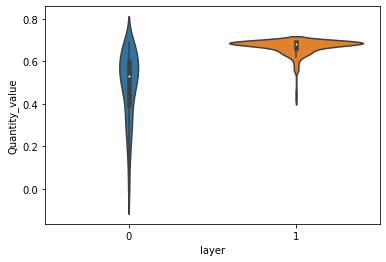

In [ ]:
#Violin plot 
import seaborn as sns
ax = sns.violinplot(data= (Entropy_1st, Entropy_2st))
ax.set_xlabel("layer")
ax.set_ylabel("Quantity_value")
plt.show()

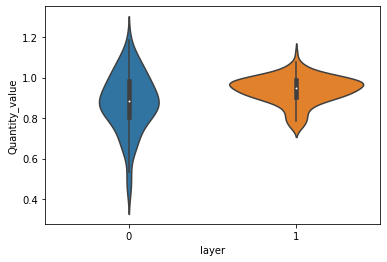

In [ ]:
ax = sns.violinplot(data= (MI_1st, MI_2st))
ax.set_xlabel("layer")
ax.set_ylabel("Quantity_value")
plt.show()

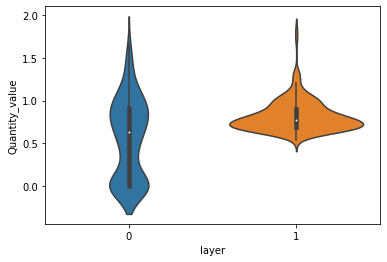

In [ ]:
ax = sns.violinplot(data= (KL_sel_1st, KL_sel_2st))
ax.set_xlabel("layer")
ax.set_ylabel("Quantity_value")
plt.show()

## Layer-wise Ablation (Fig 1) [bias balancing]

In [ ]:
def cal_performance(model,test_loader, mask):
    running_testloss, test_acc = 0.0, 0.0
    test_cnt = 0

    with torch.set_grad_enabled(False):
        for test_data, test_labels in test_loader:
            # Transfer to GPU
            test_data, test_labels = test_data.to(device), test_labels.to(device)
            
            # Model computations
            # forward + backward + optimize
            test_data = test_data.view(test_data.size(0), -1)       
            x1 = torch.sigmoid(model.fc1(test_data))
            x1 = x1 * mask[0:200,:].T
            x2 = torch.sigmoid(model.fc2(x1))
            x2 = x2 * mask[200:,:].T
            batch_outputs = model.fc3(x2)

            test_loss = criterion(batch_outputs, test_labels.long())

            running_testloss += test_loss.item()

            test_acc += torch.sum(torch.argmax(batch_outputs, dim =1) ==  test_labels.long()) / torch.numel(test_labels)

            # if test_cnt % 100 == 99:    # print every 10 mini-batches
            #     print("Cost of testidation data after %i iterations in epoch %i : %f" %(test_cnt + 1,epoch + 1, running_loss / 100))
            #     running_loss = 0.0

            test_cnt += 1

    return (100 * test_acc / test_cnt).item() 

In [ ]:
Entropy = torch.cat((Entropy_1st, Entropy_2st),0).unsqueeze(-1)
MI = torch.cat((MI_1st, MI_2st),0)
KL_sel = torch.cat((KL_sel_1st, KL_sel_2st),0)
p = torch.cat((p_1st, p_2st),0)

### First Layer

In [ ]:
random_performances = []
random_bias_performances = []

for n_abl in tqdm(range(80)):
    random_idx = np.random.choice(np.arange(200), size= n_abl+1, replace = False)
    random_idx = torch.from_numpy(random_idx)
    mask1 = torch.ones((400,1))
    mask1[random_idx] = 0
    random_performances.append(cal_performance(Net, test_loader, mask1))
 
    mask2 = torch.ones((400,1))
    mask2[random_idx,0] = torch.index_select(p, 0, random_idx)[:,1]
    random_bias_performances.append(cal_performance(Net, test_loader, mask2))

  0%|          | 0/80 [00:00<?, ?it/s]

In [ ]:
MI_performances = []
MI_bias_performances = []

for n_abl in tqdm(range(80)):

    idx = torch.topk(MI_1st, n_abl+1 , dim= 0, largest = False)[1].squeeze(-1)
    mask1 = torch.ones((400,1))
    mask1[idx] = 0
    MI_performances.append(cal_performance(Net, test_loader, mask1))
 
    mask2 = torch.ones((400,1))
    mask2[idx,0] = torch.index_select(p, 0, idx)[:,1]
    MI_bias_performances.append(cal_performance(Net, test_loader, mask2))

  0%|          | 0/80 [00:00<?, ?it/s]

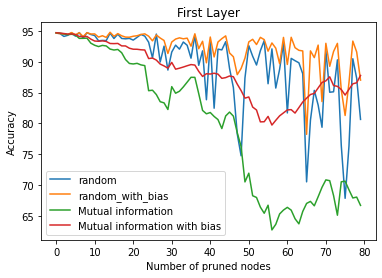

In [ ]:
plt.plot(random_performances)
plt.plot(random_bias_performances)
plt.plot(MI_performances)
plt.plot(MI_bias_performances)
plt.title("First Layer")
plt.ylabel('Accuracy')
plt.xlabel('Number of pruned nodes')
plt.legend(labels = ["random", "random_with_bias", "Mutual information", "Mutual information with bias"])
plt.show()

### Second layer

In [ ]:
random_performances = []
random_bias_performances = []

for n_abl in tqdm(range(80)):
    random_idx = np.random.choice(np.arange(200), size= n_abl+1, replace = False) + 200
    random_idx = torch.from_numpy(random_idx)
    mask1 = torch.ones((400,1))
    mask1[random_idx] = 0
    random_performances.append(cal_performance(Net, test_loader, mask1))
 
    mask2 = torch.ones((400,1))
    mask2[random_idx,0] = torch.index_select(p, 0, random_idx)[:,1]
    random_bias_performances.append(cal_performance(Net, test_loader, mask2))

  0%|          | 0/80 [00:00<?, ?it/s]

In [ ]:
MI_performances = []
MI_bias_performances = []

for n_abl in tqdm(range(80)):

    idx = torch.topk(MI_2st, n_abl+1 , dim= 0, largest = False)[1].squeeze(-1) + 200
    mask1 = torch.ones((400,1))
    mask1[idx] = 0
    MI_performances.append(cal_performance(Net, test_loader, mask1))
 
    mask2 = torch.ones((400,1))
    mask2[idx,0] = torch.index_select(p, 0, idx)[:,1]
    MI_bias_performances.append(cal_performance(Net, test_loader, mask2))

  0%|          | 0/80 [00:00<?, ?it/s]

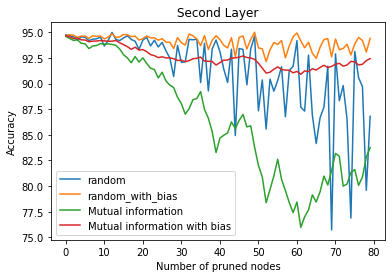

In [ ]:
plt.plot(random_performances)
plt.plot(random_bias_performances)
plt.plot(MI_performances)
plt.plot(MI_bias_performances)
plt.title("Second Layer")
plt.ylabel('Accuracy')
plt.xlabel('Number of pruned nodes')
plt.legend(labels = ["random", "random_with_bias", "Mutual information", "Mutual information with bias"])
plt.show()

## Whole-Network ablation (Fig 3)

In [ ]:
Entropy = torch.cat((Entropy_1st, Entropy_2st),0).unsqueeze(-1)
MI = torch.cat((MI_1st, MI_2st),0)
KL_sel = torch.cat((KL_sel_1st, KL_sel_2st),0)
p = torch.cat((p_1st, p_2st),0)

In [ ]:
random_bias_performances = []

for n_abl in tqdm(range(80)):
    random_idx = np.random.choice(np.arange(400), size= n_abl+1, replace = False)
    random_idx = torch.from_numpy(random_idx)
    mask2 = torch.ones((400,1))
    mask2[random_idx,0] = torch.index_select(p, 0, random_idx)[:,1]
    random_bias_performances.append(cal_performance(Net, test_loader, mask2))

  0%|          | 0/80 [00:00<?, ?it/s]

In [ ]:
MI_bias_performances = []

for n_abl in tqdm(range(80)):

    idx = torch.topk(MI, n_abl+1 , dim= 0, largest = False)[1].squeeze(-1) 
    mask2 = torch.ones((400,1))
    mask2[idx,0] = torch.index_select(p, 0, idx)[:,1]
    MI_bias_performances.append(cal_performance(Net, test_loader, mask2))

  0%|          | 0/80 [00:00<?, ?it/s]

In [ ]:
KL_bias_performances = []

for n_abl in tqdm(range(80)):

    idx = torch.topk(KL_sel, n_abl+1 , dim= 0, largest = False)[1].squeeze(-1)  
    mask2 = torch.ones((400,1))
    mask2[idx,0] = torch.index_select(p, 0, idx)[:,1]
    KL_bias_performances.append(cal_performance(Net, test_loader, mask2))

  0%|          | 0/80 [00:00<?, ?it/s]

In [ ]:
Entropy_bias_performances = []

for n_abl in tqdm(range(80)):

    idx = torch.topk(Entropy, n_abl+1 , dim= 0, largest = False)[1].squeeze(-1)  
    mask2 = torch.ones((400,1))
    mask2[idx,0] = torch.index_select(p, 0, idx)[:,1]
    Entropy_bias_performances.append(cal_performance(Net, test_loader, mask2))

  0%|          | 0/80 [00:00<?, ?it/s]

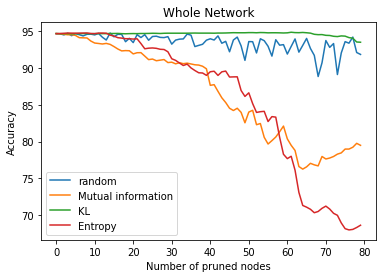

In [ ]:
plt.plot(random_bias_performances)
plt.plot(MI_bias_performances)
plt.plot(KL_bias_performances)
plt.plot(Entropy_bias_performances)
plt.title("Whole Network")
plt.ylabel('Accuracy')
plt.xlabel('Number of pruned nodes')
plt.legend(labels = ["random", "Mutual information", "KL", "Entropy"])
plt.show()

## Layer-wise Ablation (Fig 4)

### First Layer

#### High values first

In [ ]:
random_bias_performances = []

for n_abl in tqdm(range(80)):
    random_idx = np.random.choice(np.arange(200), size= n_abl+1, replace = False)
    random_idx = torch.from_numpy(random_idx) 
    mask2 = torch.ones((400,1))
    mask2[random_idx,0] = torch.index_select(p, 0, random_idx)[:,1]
    random_bias_performances.append(cal_performance(Net, test_loader, mask2))

  0%|          | 0/80 [00:00<?, ?it/s]

In [ ]:
MI_bias_performances = []

for n_abl in tqdm(range(80)):
    idx = torch.topk(MI_1st, n_abl+1 , dim= 0)[1].squeeze(-1)
    mask2 = torch.ones((400,1))
    mask2[idx,0] = torch.index_select(p, 0, idx)[:,1]
    MI_bias_performances.append(cal_performance(Net, test_loader, mask2))

  0%|          | 0/80 [00:00<?, ?it/s]

In [ ]:
KL_bias_performances = []

for n_abl in tqdm(range(80)):
    idx = torch.topk(KL_sel_1st, n_abl+1 , dim= 0)[1].squeeze(-1)
    mask2 = torch.ones((400,1))
    mask2[idx,0] = torch.index_select(p, 0, idx)[:,1]
    KL_bias_performances.append(cal_performance(Net, test_loader, mask2))

  0%|          | 0/80 [00:00<?, ?it/s]

In [ ]:
Entropy_bias_performances = []

for n_abl in tqdm(range(80)):
    idx = torch.topk(Entropy_1st, n_abl+1 , dim= 0)[1].squeeze(-1)
    mask2 = torch.ones((400,1))
    mask2[idx,0] = torch.index_select(p, 0, idx)[:,1]
    Entropy_bias_performances.append(cal_performance(Net, test_loader, mask2))

  0%|          | 0/80 [00:00<?, ?it/s]

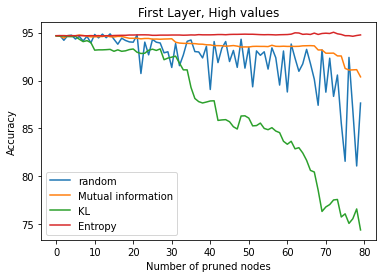

In [ ]:
plt.plot(random_bias_performances)
plt.plot(MI_bias_performances)
plt.plot(KL_bias_performances)
plt.plot(Entropy_bias_performances)
plt.title("First Layer, High values")
plt.ylabel('Accuracy')
plt.xlabel('Number of pruned nodes')
plt.legend(labels = ["random", "Mutual information", "KL", "Entropy"])
plt.show()

#### Low values first

In [ ]:
random_bias_performances = []

for n_abl in tqdm(range(80)):
    random_idx = np.random.choice(np.arange(200), size= n_abl+1, replace = False)
    random_idx = torch.from_numpy(random_idx) 
    mask2 = torch.ones((400,1))
    mask2[random_idx,0] = torch.index_select(p, 0, random_idx)[:,1]
    random_bias_performances.append(cal_performance(Net, test_loader, mask2))

  0%|          | 0/80 [00:00<?, ?it/s]

In [ ]:
MI_bias_performances = []

for n_abl in tqdm(range(80)):
    idx = torch.topk(MI_1st, n_abl+1 , dim= 0, largest = False)[1].squeeze(-1)
    mask2 = torch.ones((400,1))
    mask2[idx,0] = torch.index_select(p, 0, idx)[:,1]
    MI_bias_performances.append(cal_performance(Net, test_loader, mask2))

  0%|          | 0/80 [00:00<?, ?it/s]

In [ ]:
KL_bias_performances = []

for n_abl in tqdm(range(80)):
    idx = torch.topk(KL_sel_1st, n_abl+1 , dim= 0, largest = False )[1].squeeze(-1)
    mask2 = torch.ones((400,1))
    mask2[idx,0] = torch.index_select(p, 0, idx)[:,1]
    KL_bias_performances.append(cal_performance(Net, test_loader, mask2))

  0%|          | 0/80 [00:00<?, ?it/s]

In [ ]:
Entropy_bias_performances = []

for n_abl in tqdm(range(80)):
    idx = torch.topk(Entropy_1st, n_abl+1 , dim= 0, largest = False)[1].squeeze(-1)
    mask2 = torch.ones((400,1))
    mask2[idx,0] = torch.index_select(p, 0, idx)[:,1]
    Entropy_bias_performances.append(cal_performance(Net, test_loader, mask2))

  0%|          | 0/80 [00:00<?, ?it/s]

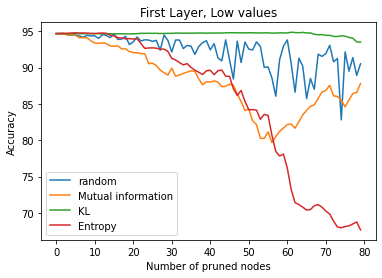

In [ ]:
plt.plot(random_bias_performances)
plt.plot(MI_bias_performances)
plt.plot(KL_bias_performances)
plt.plot(Entropy_bias_performances)
plt.title("First Layer, Low values")
plt.ylabel('Accuracy')
plt.xlabel('Number of pruned nodes')
plt.legend(labels = ["random", "Mutual information", "KL", "Entropy"])
plt.show()

### Second Layer

#### High values first

In [ ]:
random_bias_performances = []

for n_abl in tqdm(range(80)):
    random_idx = np.random.choice(np.arange(200), size= n_abl+1, replace = False) +200
    random_idx = torch.from_numpy(random_idx) 
    mask2 = torch.ones((400,1))
    mask2[random_idx,0] = torch.index_select(p, 0, random_idx)[:,1]
    random_bias_performances.append(cal_performance(Net, test_loader, mask2))

  0%|          | 0/80 [00:00<?, ?it/s]

In [ ]:
MI_bias_performances = []

for n_abl in tqdm(range(80)):
    idx = torch.topk(MI_2st, n_abl+1 , dim= 0)[1].squeeze(-1) + 200
    mask2 = torch.ones((400,1))
    mask2[idx,0] = torch.index_select(p, 0, idx)[:,1]
    MI_bias_performances.append(cal_performance(Net, test_loader, mask2))

  0%|          | 0/80 [00:00<?, ?it/s]

In [ ]:
KL_bias_performances = []

for n_abl in tqdm(range(80)):
    idx = torch.topk(KL_sel_2st, n_abl+1 , dim= 0)[1].squeeze(-1) + 200 
    mask2 = torch.ones((400,1))
    mask2[idx,0] = torch.index_select(p, 0, idx)[:,1]
    KL_bias_performances.append(cal_performance(Net, test_loader, mask2))

  0%|          | 0/80 [00:00<?, ?it/s]

In [ ]:
Entropy_bias_performances = []

for n_abl in tqdm(range(80)):
    idx = torch.topk(Entropy_2st, n_abl+1 , dim= 0)[1].squeeze(-1) + 200
    mask2 = torch.ones((400,1))
    mask2[idx,0] = torch.index_select(p, 0, idx)[:,1]
    Entropy_bias_performances.append(cal_performance(Net, test_loader, mask2))

  0%|          | 0/80 [00:00<?, ?it/s]

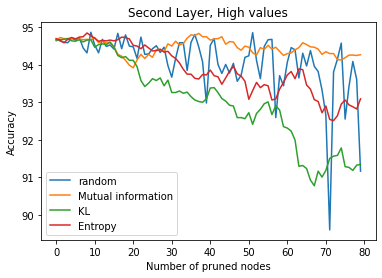

In [ ]:
plt.plot(random_bias_performances)
plt.plot(MI_bias_performances)
plt.plot(KL_bias_performances)
plt.plot(Entropy_bias_performances)
plt.title("Second Layer, High values")
plt.ylabel('Accuracy')
plt.xlabel('Number of pruned nodes')
plt.legend(labels = ["random", "Mutual information", "KL", "Entropy"])
plt.show()

#### Low values first

In [ ]:
random_bias_performances = []

for n_abl in tqdm(range(80)):
    random_idx = np.random.choice(np.arange(200), size= n_abl+1, replace = False) + 200
    random_idx = torch.from_numpy(random_idx) 
    mask2 = torch.ones((400,1))
    mask2[random_idx,0] = torch.index_select(p, 0, random_idx)[:,1]
    random_bias_performances.append(cal_performance(Net, test_loader, mask2))

  0%|          | 0/80 [00:00<?, ?it/s]

In [ ]:
MI_bias_performances = []

for n_abl in tqdm(range(80)):
    idx = torch.topk(MI_2st, n_abl+1 , dim= 0, largest = False)[1].squeeze(-1) + 200
    mask2 = torch.ones((400,1))
    mask2[idx,0] = torch.index_select(p, 0, idx)[:,1]
    MI_bias_performances.append(cal_performance(Net, test_loader, mask2))

  0%|          | 0/80 [00:00<?, ?it/s]

In [ ]:
KL_bias_performances = []

for n_abl in tqdm(range(80)):
    idx = torch.topk(KL_sel_2st, n_abl+1 , dim= 0, largest = False )[1].squeeze(-1)+ 200
    mask2 = torch.ones((400,1))
    mask2[idx,0] = torch.index_select(p, 0, idx)[:,1]
    KL_bias_performances.append(cal_performance(Net, test_loader, mask2))

  0%|          | 0/80 [00:00<?, ?it/s]

In [ ]:
Entropy_bias_performances = []

for n_abl in tqdm(range(80)):
    idx = torch.topk(Entropy_2st, n_abl+1 , dim= 0, largest = False)[1].squeeze(-1) + 200
    mask2 = torch.ones((400,1))
    mask2[idx,0] = torch.index_select(p, 0, idx)[:,1]
    Entropy_bias_performances.append(cal_performance(Net, test_loader, mask2))

  0%|          | 0/80 [00:00<?, ?it/s]

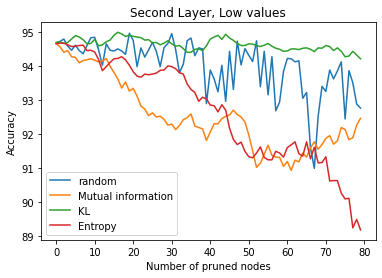

In [ ]:
plt.plot(random_bias_performances)
plt.plot(MI_bias_performances)
plt.plot(KL_bias_performances)
plt.plot(Entropy_bias_performances)
plt.title("Second Layer, Low values")
plt.ylabel('Accuracy')
plt.xlabel('Number of pruned nodes')
plt.legend(labels = ["random", "Mutual information", "KL", "Entropy"])
plt.show()